# Setup

In [1]:
!pip install pydot

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Building an Image Classifier

First let's import TensorFlow and Keras.

In [3]:
import tensorflow as tf
from tensorflow import keras

tf.random.set_seed(42) # Set random seed for reproducibility

c:\Users\User\Documents\ECU\NTI AI STUFF\.venv\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/attr_value.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
c:\Users\User\Documents\ECU\NTI AI STUFF\.venv\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/tensor.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
c:\Users\User\Documents\ECU\NTI AI STUFF\.venv\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/resource_handle.proto

In [4]:
fashion_mnist = keras.datasets.fashion_mnist #load fashion mnist dataset straight from keras
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data() #split into training and test sets

In [5]:
X_train_full.shape

(60000, 28, 28)

In [6]:
type(X_train_full)

numpy.ndarray

In [7]:
X_test.shape

(10000, 28, 28)

In [8]:
X_valid, X_train = X_train_full[:8000] / 255., X_train_full[8000:] / 255. # pixel value scaling

y_valid, y_train = y_train_full[:8000], y_train_full[8000:] # split into validation and training sets into a ratio 

X_test = X_test / 255.

In [9]:
X_train.shape, X_valid.shape

((52000, 28, 28), (8000, 28, 28))

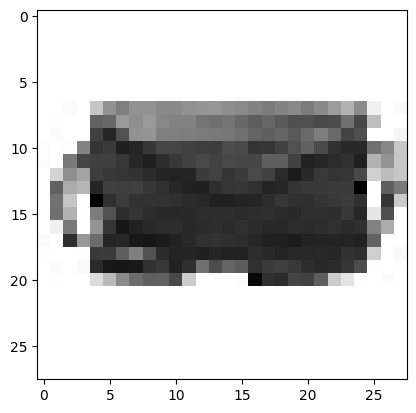

In [10]:
plt.imshow(X_train[360], cmap="binary")
plt.show()

In [11]:
np.random.randint(0,55000)

47890

In [12]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

960
11649
20134
26979


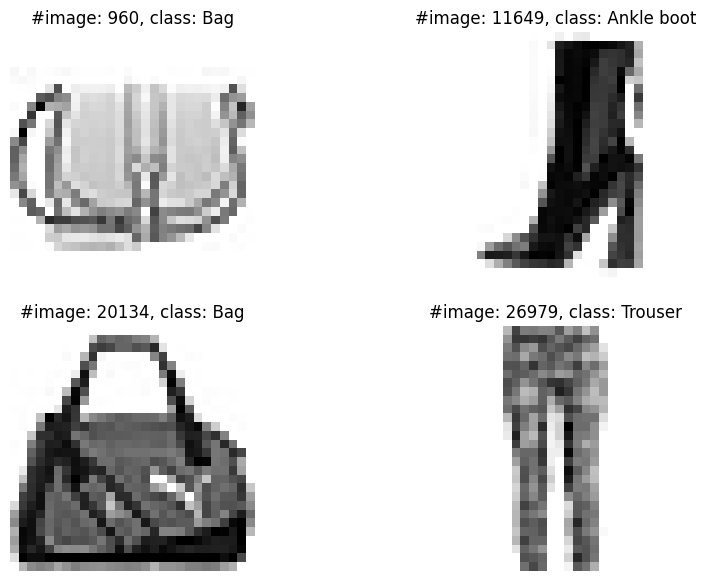

In [13]:
fig = plt.figure(figsize=(10, 7))
rows, columns = 2,2

for i in range(4):
  random_image= np.random.randint(0,55000)

  print(random_image)

  fig.add_subplot(rows, columns, i+1)

  plt.imshow (X_train[random_image], cmap="binary")
  plt.axis('off')
  plt.title(f'#image: {random_image}, class: {class_names[ y_train[random_image]] }')

plt.show()


In [14]:
y_train

array([5, 9, 5, ..., 3, 0, 5], shape=(52000,), dtype=uint8)

In [15]:
np.unique(y_train, return_counts= True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([5253, 5140, 5191, 5193, 5237, 5205, 5193, 5182, 5208, 5198]))

In [16]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [17]:
y_train[360]

np.uint8(8)

In [18]:
class_names[2]

'Pullover'

In [19]:
class_names[y_train[360]]

'Bag'

In [20]:
X_valid.shape

(8000, 28, 28)

In [21]:
X_test.shape

(10000, 28, 28)

In [22]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu", name="hidden_layer1"))
model.add(keras.layers.Dense(100, activation="relu", name="hidden_layer2"))
model.add(keras.layers.Dense(10, activation="softmax", name="output_layer"))

c:\Users\User\Documents\ECU\NTI AI STUFF\.venv\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Another way of making keras fully connected model is as follows:

In [23]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu", name="hidden_layer1"),
    keras.layers.Dense(100, activation="relu", name="hidden_layer2"),
    keras.layers.Dense(10, activation="softmax", name="output_layer")
])

In [24]:
model.layers

[<Flatten name=flatten_1, built=True>,
 <Dense name=hidden_layer1, built=True>,
 <Dense name=hidden_layer2, built=True>,
 <Dense name=output_layer, built=True>]

In [25]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer1 (Dense)           │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer2 (Dense)           │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

In [26]:
keras.utils.plot_model(model, "my_fashion_mnist_model.png", show_shapes=True)

You must install graphviz (see instructions at https://graphviz.gitlab.io/download/) for `plot_model` to work.


In [27]:
model.layers[1].name

'hidden_layer1'

In [28]:
model.get_layer(model.layers[1].name)

<Dense name=hidden_layer1, built=True>

In [29]:
weights, biases = model.layers[1].get_weights() 

In [30]:
weights

array([[ 0.05714542,  0.03387572, -0.0037117 , ...,  0.04115456,
        -0.00699595, -0.05904979],
       [-0.01260411,  0.06086826,  0.04527967, ..., -0.02439446,
         0.0676747 ,  0.02251666],
       [-0.03985891, -0.00910997, -0.07091037, ...,  0.02675402,
         0.01909077,  0.04552323],
       ...,
       [ 0.01456363, -0.01296525, -0.02322754, ..., -0.04881285,
        -0.07346482,  0.0653626 ],
       [ 0.05497757, -0.06377131, -0.07377452, ...,  0.00671027,
        -0.06466071, -0.06179389],
       [ 0.07287915,  0.04518415, -0.00217124, ...,  0.01470887,
        -0.05630489, -0.06719374]], shape=(784, 300), dtype=float32)

In [31]:
weights.shape #Weights determine the slope/importance of each input.

(784, 300)

In [32]:
biases #Bias shifts the function to better fit the data.

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [33]:
biases.shape

(300,)

In [34]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)

model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [35]:
history = model.fit(
    X_train, y_train,
    epochs=20,
    shuffle=True,
    batch_size=32,
    validation_data=(X_valid, y_valid),
    callbacks=[early_stopping_cb]
)

Epoch 1/20
1625/1625 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.6761 - loss: 1.0260 - val_accuracy: 0.8248 - val_loss: 0.5122
Epoch 2/20
1625/1625 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8236 - loss: 0.5094 - val_accuracy: 0.8461 - val_loss: 0.4509
Epoch 3/20
1625/1625 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8408 - loss: 0.4555 - val_accuracy: 0.8545 - val_loss: 0.4231
Epoch 4/20
1625/1625 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8514 - loss: 0.4253 - val_accuracy: 0.8597 - val_loss: 0.4046
Epoch 5/20
1625/1625 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8588 - loss: 0.4042 - val_accuracy: 0.8646 - val_loss: 0.3917
Epoch 6/20
1625/1625 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8650 - loss: 0.3875 - val_accuracy: 0.8689 - val_loss: 0.3811
Epoch 7/20
1625/1625 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8690 - loss: 0.3736 - val_accuracy: 0.8709 - val_loss: 0.3725
Epoch 8/20
1625/1625 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8726 - loss: 0.3614 - 

In [36]:
history.params

{'verbose': 'auto', 'epochs': 20, 'steps': 1625}

In [37]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [38]:
import pandas as pd
pd.DataFrame(history.history)

,accuracy,loss,val_accuracy,val_loss
0,0.761019,0.734103,0.824750,0.512154
1,0.829904,0.493042,0.846125,0.450885
2,0.844654,0.446383,0.854500,0.423076
3,0.853712,0.418500,0.859750,0.404567
4,0.860462,0.398364,0.864625,0.391675
5,0.865750,0.382328,0.868875,0.381100
6,0.869404,0.368780,0.870875,0.372514
7,0.873096,0.356919,0.872750,0.365185
8,0.877115,0.346443,0.874125,0.358718
9,0.880250,0.336990,0.876375,0.353421


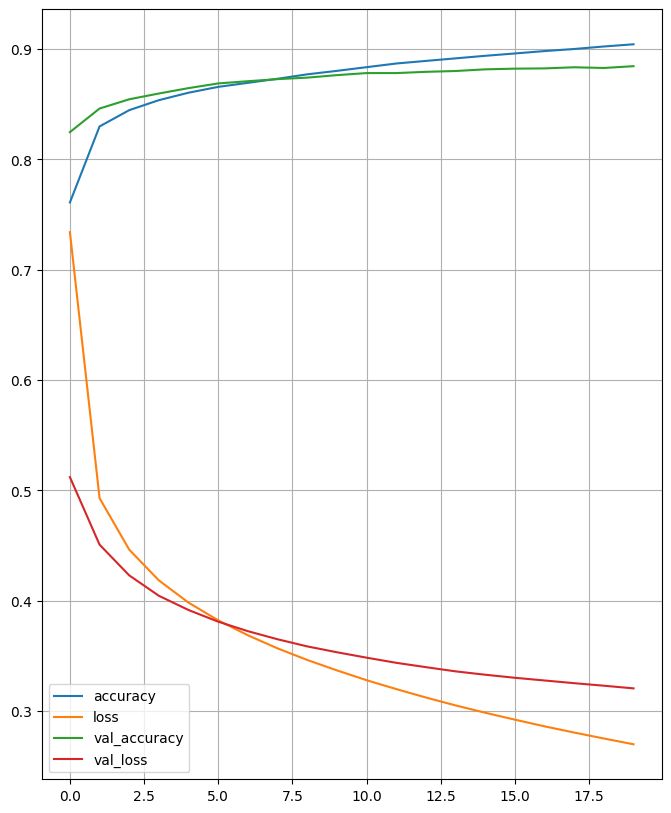

In [39]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 10))
plt.grid(True)
# plt.gca().set_ylim(0, 2)
plt.show()

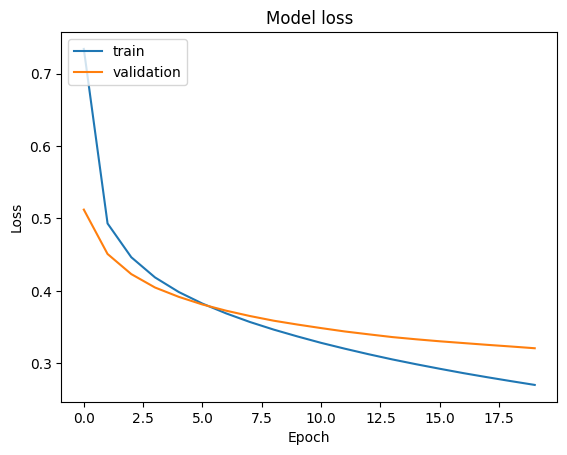

In [40]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test loss: {test_loss:.4f}")
print(f"Test accuracy: {test_acc:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8769 - loss: 0.3464
Test loss: 0.3453
Test accuracy: 0.8744


In [ ]:
X_new = X_test
y_proba = model.predict(X_new)
y_proba.round(2)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[0.  , 0.  , 0.  , ..., 0.02, 0.  , 0.95],
       [0.  , 0.  , 0.99, ..., 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       ...,
       [0.01, 0.  , 0.  , ..., 0.  , 0.98, 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.02, 0.01, 0.  ]],
      shape=(10000, 10), dtype=float32)

In [43]:
y_pred = np.argmax(model.predict(X_new), axis=-1)
y_pred

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([9, 2, 1, ..., 8, 1, 5], shape=(10000,))

In [44]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser', ..., 'Bag', 'Trouser',
       'Sandal'], shape=(10000,), dtype='<U11')

In [45]:
y_new = y_test[:1]
y_new

array([9], dtype=uint8)

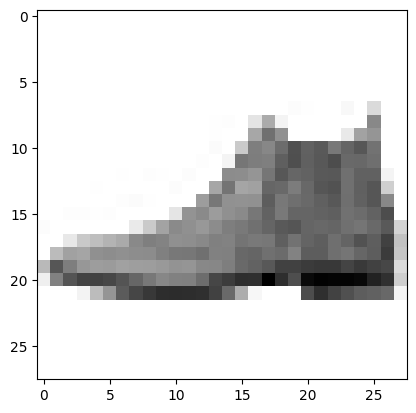

In [46]:
plt.imshow(X_test[0],cmap="binary")

In [47]:
X_new.shape

(10000, 28, 28)

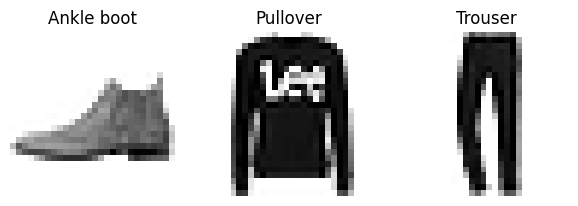

In [48]:
plt.figure(figsize=(7.2, 2.4))

for index, image in enumerate(X_new[:3]):  # Slices X_new to a maximum of 3 images
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]], fontsize=12)

plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()


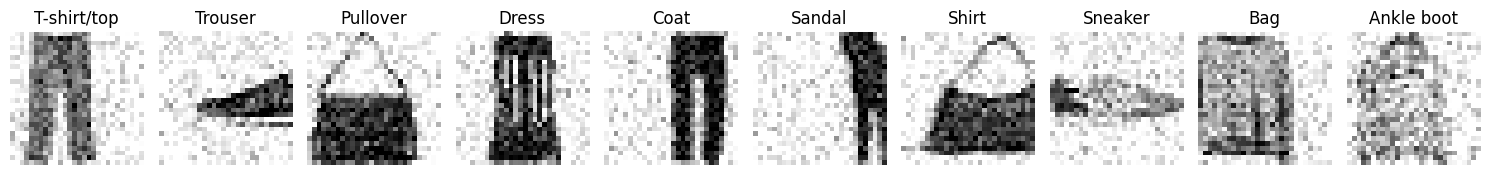

In [ ]:
def create_synthetic_images(images, num_samples=1000, noise_level=0.2):
    idx = np.random.choice(images.shape[0], num_samples, replace=False)
    base_images = images[idx]
    augmented_images = []
    for img in base_images:
        # Random horizontal flip
        if np.random.rand() > 0.5:
            img = np.fliplr(img)
        # Random rotation (-15 to +15 degrees)
        angle = np.random.uniform(-30, 30)
        img_aug = keras.preprocessing.image.apply_affine_transform(
            np.expand_dims(img, axis=-1), theta=angle, fill_mode='nearest'
        )
        img = np.squeeze(img_aug, axis=-1)
        augmented_images.append(img)
    base_images = np.array(augmented_images)
    noise = np.random.normal(loc=0.0, scale=noise_level, size=base_images.shape)
    synthetic_images = np.clip(base_images + noise, 0.0, 1.0)
    return synthetic_images

synthetic_data = create_synthetic_images(X_train, num_samples=500, noise_level=0.15)
unique_labels = np.unique(y_train)
fig, axes = plt.subplots(1, len(unique_labels), figsize=(15, 3))
for idx, label in enumerate(unique_labels):
    # Show the first synthetic image for each class 
    img = synthetic_data[idx]
    axes[idx].imshow(img, cmap="binary")
    axes[idx].set_title(class_names[label])
    axes[idx].axis('off')
plt.tight_layout()
plt.show()

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Synthetic predictions: [6 7 8 0 9 5 8 8 8 8]


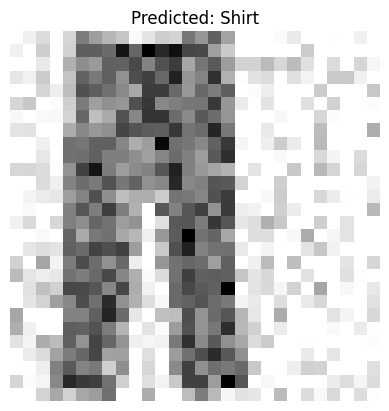

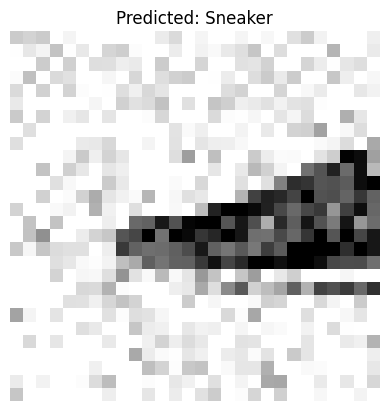

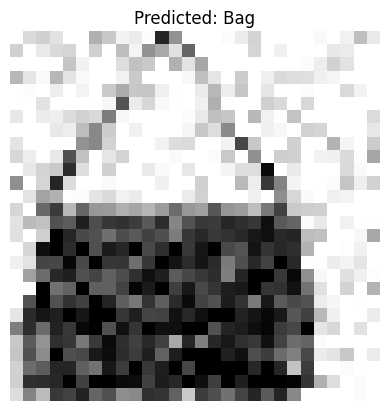

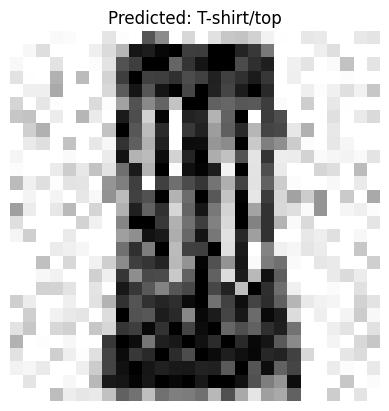

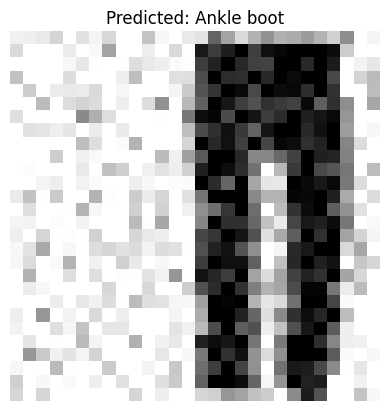

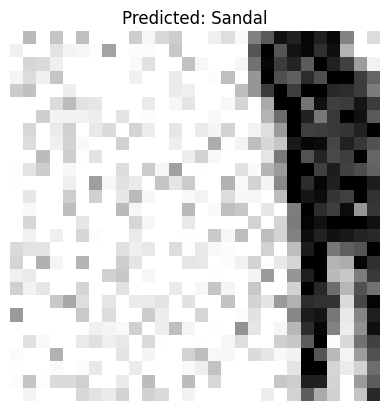

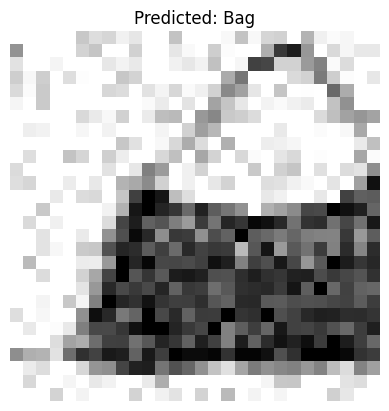

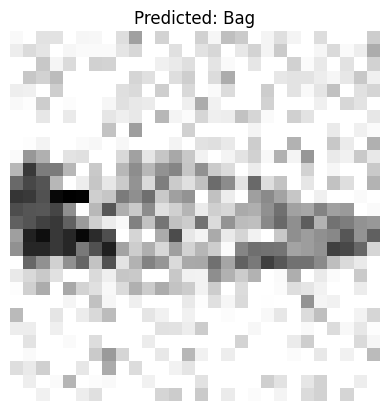

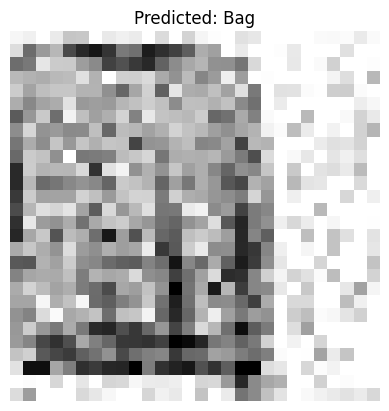

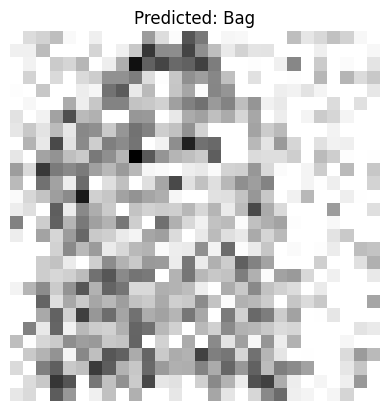

In [50]:
synthetic_pred = np.argmax(model.predict(synthetic_data), axis=-1)
print("Synthetic predictions:", synthetic_pred[:10])
for i in range(10):
    plt.imshow(synthetic_data[i], cmap="binary")
    plt.title(f"Predicted: {class_names[synthetic_pred[i]]}")
    plt.axis('off')
    plt.show()

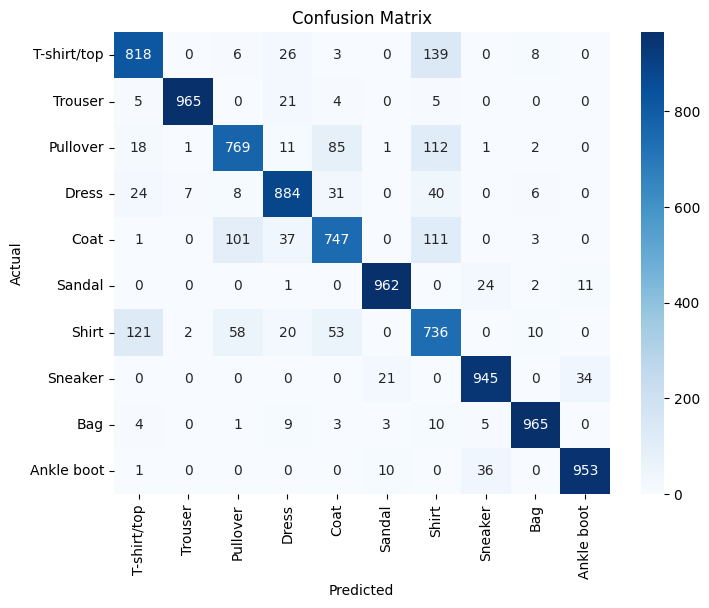

In [52]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [54]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred, target_names=class_names))

              precision    recall  f1-score   support

 T-shirt/top       0.82      0.82      0.82      1000
     Trouser       0.99      0.96      0.98      1000
    Pullover       0.82      0.77      0.79      1000
       Dress       0.88      0.88      0.88      1000
        Coat       0.81      0.75      0.78      1000
      Sandal       0.96      0.96      0.96      1000
       Shirt       0.64      0.74      0.68      1000
     Sneaker       0.93      0.94      0.94      1000
         Bag       0.97      0.96      0.97      1000
  Ankle boot       0.95      0.95      0.95      1000

    accuracy                           0.87     10000
   macro avg       0.88      0.87      0.88     10000
weighted avg       0.88      0.87      0.88     10000

